<a href="https://colab.research.google.com/github/mlr2dev/machine_learning_refined_q1_2023_dev/blob/j_branch/notes/9_Feature_engineer_select/9_4_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 9: Principles of Feature Engineering and Selection

# 9.4  Imputing Missing Values in a Dataset

Real world data can contain *missing values* due to human error in collection, storage issues, faulty sensors, etc.,  If a supervised learning datapoint is missing its *output* value - e.g., if a classification datapoint is missing its *label* - there can be little we can do to salvage the datapoint, and usually such a corrupted datapoint is thrown away.  Likewise, if a large number of the values of an input are missing the data is best discarded.  However a datapoint whose input is missing just a handful of *input (feature) values* can be salvaged, and such points should be salvaged since data is often a scarce resource.  Because machine learning models take in only numerical valued objects, in order for us to be able to use a datapoint with missing entries in training any machine learning model we must *fill in missing input features with numerical values* (this is often called *imputing*).  But what values should we set missing entries too? 

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone images
    if not Path('chapter_9_images').is_dir():
        !ghclone https://github.com/mlr2dev/machine_learning_refined_q1_2023_dev/tree/j_branch/notes/9_Feature_engineer_select/chapter_9_images
    else:
        print('chapter_9_images already cloned!')

        
# image paths
image_path_1 = "chapter_9_images/mean_inpute_stadnard_normal.png"

# standard imports
import matplotlib.pyplot as plt
from matplotlib import gridspec
import IPython, copy
from IPython.display import Image, HTML

# standard imports
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## Imputing using the mean

 Suppose we have a set of $P$ inputs, each of which is $N$ dimensional, and say that the $j^{th}$ point has is missing its $n^{th}$ input feature value.  In other words, the value $x_{j,n}$ is missing from our input data.  A reasonable value to fill for this missing entry is simply the *average of the dataset along this dimension*, since this can roughly be considered the 'standard' value of our input along this dimension.  If in particular we use the *mean* $\mu_n$ of our input along this dimension (ignoring our missing entry $x_{j,n}$) we set $x_{j,n} = \mu_n$ where
 
\begin{equation}
\mu_n = \frac{1}{P-1} \sum_{\underset{p \neq j}{j=1}}^P x_{p,n}.
\end{equation}

This is often called *mean-imputation*.

Notice how, in mean-imputing $x_{p,n}$, that the mean value of the entire $n^{th}$ feature of the input with the inputed value *does not change*.  We can see this by simply computing the mean of the new $n^{th}$ input dimension as

\begin{equation}
\frac{1}{P} \sum_{p=1}^P x_{p,n} = \frac{1}{P} \sum_{\underset{p \neq j}{j=1}}^P  x_{p,n} + \frac{1}{P} x_{j,n} = \frac{P - 1}{P} \frac{1}{P-1} \sum_{\underset{p \neq j}{j=1}}^Px_{p,n} + \frac{1}{P} x_{j,n} = \frac{P - 1}{P} \mu_n + \frac{1}{P} \mu_n = \mu_n.
\end{equation}

Also notice that if we impute missing values of a dataset *using the mean along each input dimension* that if we then *standard normalize* this dataset, *all values imputed with the mean become exactly zero*.  Because the mean of an input feature that has been imputed with mean values does not change (as shown above), when we *mean-center* the dataset (the first step in standard normalization) by *subtracting* the mean of this input dimension the resulting value becomes exactly zero (this is illustrated in the figure below for a simple case where $N = 2$).  Any model weight touching such a mean-imputed entry is then comopletely nullified numerically.  In other words, in training any mean-imputed value will not directly contribute to the tuning of its associated feature weight (provided the input has been standard normalized).  This is very desireable given that such values were missing to begin with.

More generally if our input is missing multiple entries along this dimension we can just as reasonably replace each one with the mean along the $n^{th}$ feature, where in computing this mean we once again exclude missing values.  Again one can see that with these imputed values the *mean along this dimension does not change*.

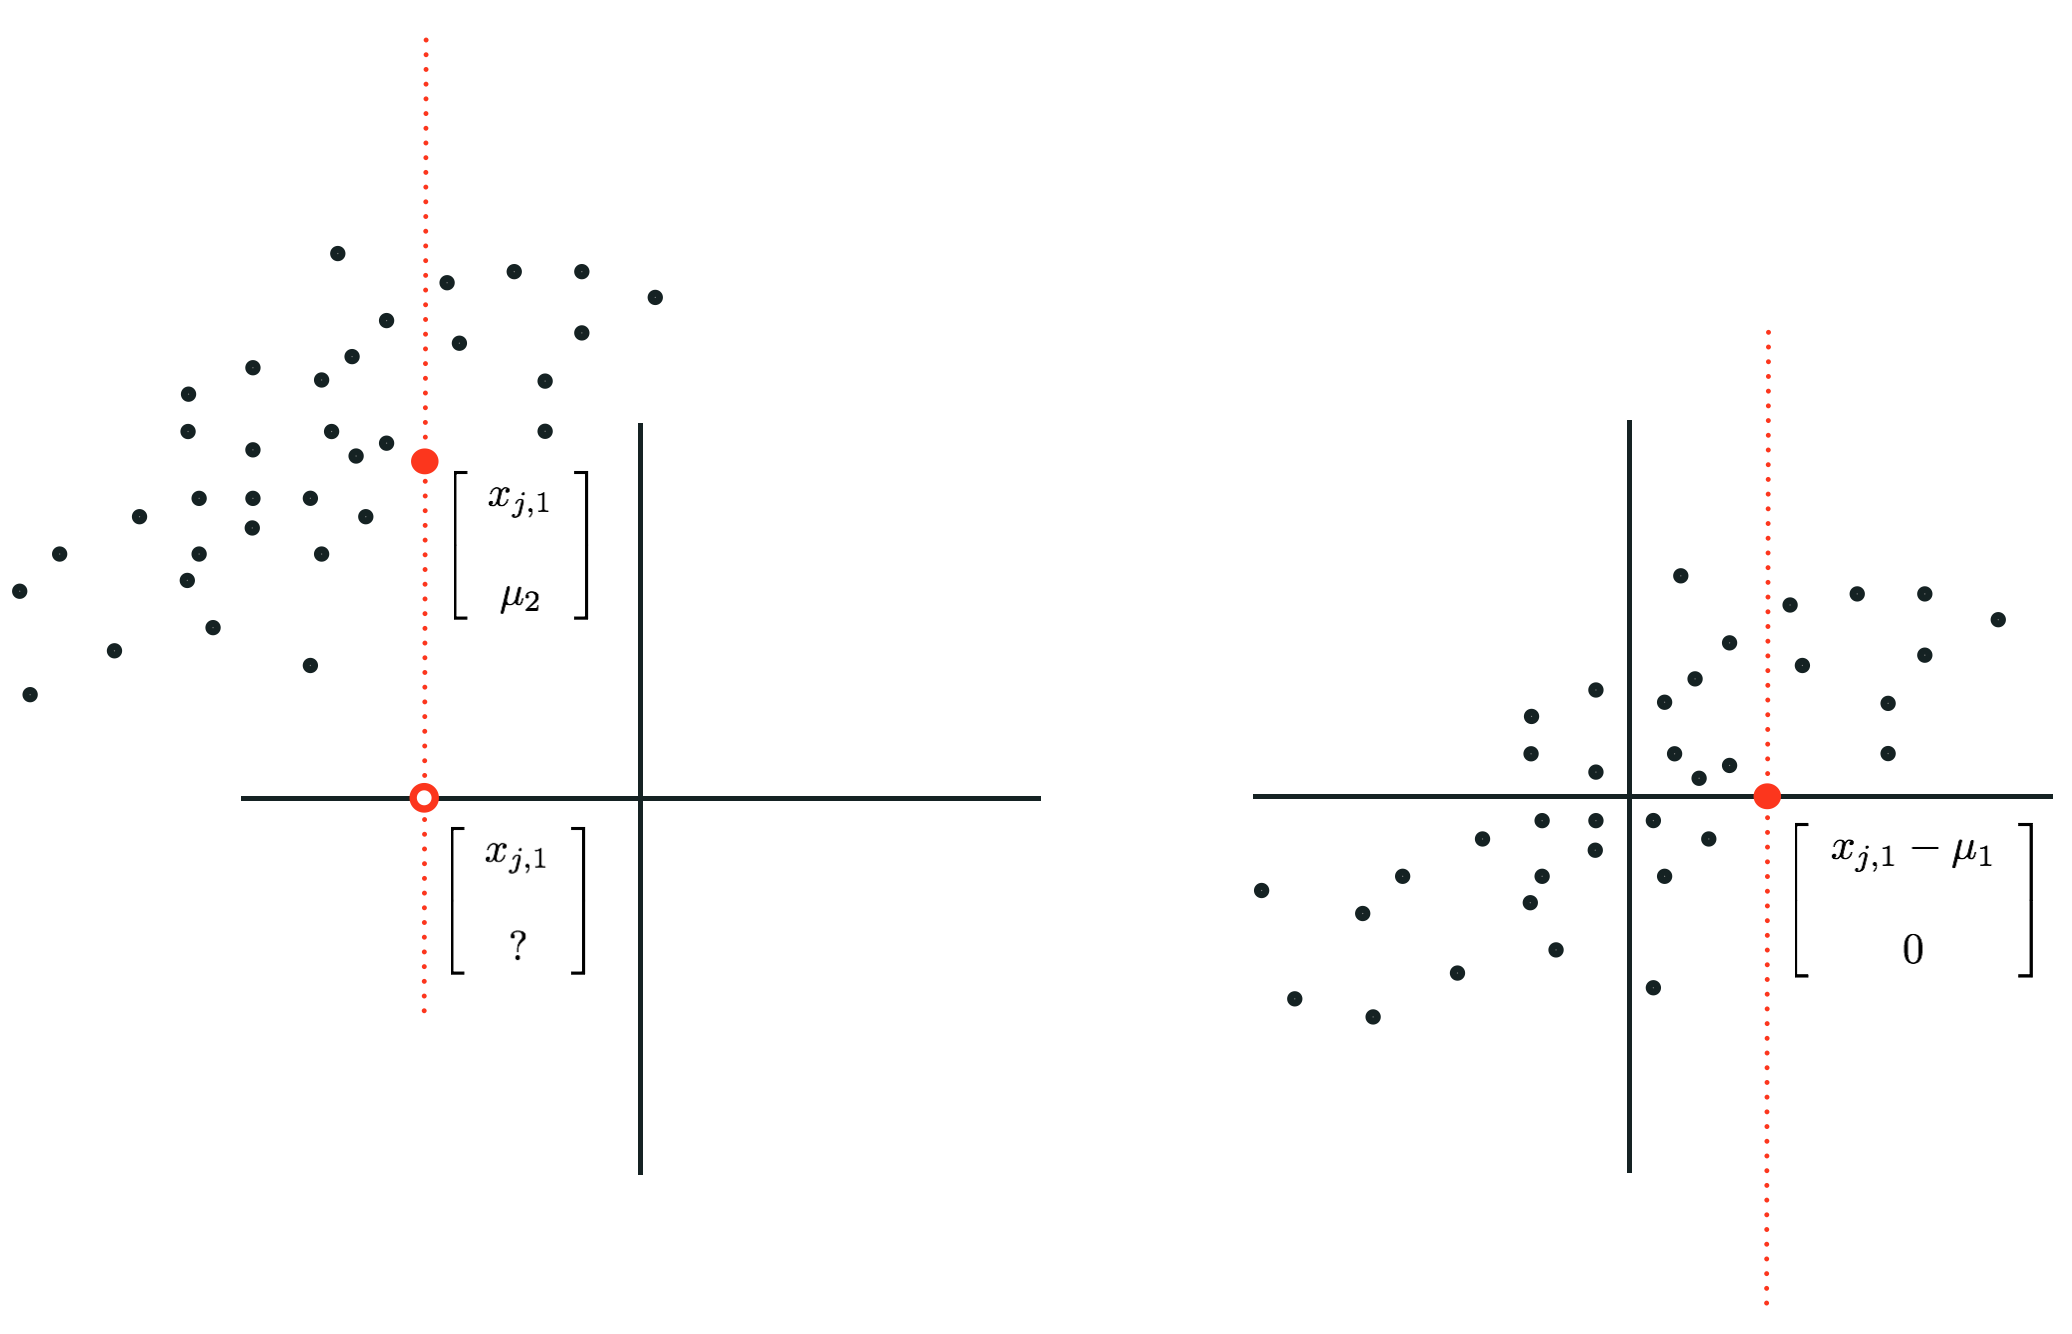

In [ ]:
Image(image_path_1)

<figure>
  <figcaption>   
<strong>Figure 1:</strong> <em> 
(left panel) The input of a prototypical $N = 2$ dimensional dataset where a single point $\mathbf{x}_j$,  drawn as a *hollow* red dot, is missing its second entry.  The mean-imputed version of this point is then shown as a *filled-in* red point.  (right panel) By standard-normalizing such a dataset the mean-imputed value of $\mathbf{x}_j$ becomes *exactly equal to zero*.
</em>  </figcaption> 
</figure>